<a href="https://colab.research.google.com/github/yeojeong735/2025-1-BD/blob/main/inclass/05w_0407_easy_ch05_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 05주 수업

## 05-3 파생변수 생성 (p.116)

In [7]:
import pandas as pd
import numpy as np

df = pd.DataFrame({'var1' : [4,3,8], 'var2':[2,6,1]})
df

,var1,var2
0,4,2
1,3,6
2,8,1


In [8]:
df1 = df.copy()
df1

,var1,var2
0,4,2
1,3,6
2,8,1


In [10]:
df1['var_sum'] = df1.var1 + df1.var2
df1

,var1,var2,var_sum
0,4,2,6
1,3,6,9
2,8,1,9


In [11]:
df1['var_min'] = (df1.var1 + df1.var2) / 2
df1

,var1,var2,var_sum,var_min
0,4,2,6,3.0
1,3,6,9,4.5
2,8,1,9,4.5


In [12]:
df2 = df1.copy()
df2

,var1,var2,var_sum,var_min
0,4,2,6,3.0
1,3,6,9,4.5
2,8,1,9,4.5


In [13]:
df.sum()

,0
var1,15
var2,9


In [14]:
df.sum(axis=1)

,0
0,6
1,9
2,9


In [16]:
df2['my_sum'] = df2.sum(axis=1)
df2

,var1,var2,var_sum,var_min,my_sum
0,4,2,6,3.0,15.0
1,3,6,9,4.5,22.5
2,8,1,9,4.5,22.5


In [18]:
df2[['var1', 'var2']]

,var1,var2
0,4,2
1,3,6
2,8,1


In [19]:
df2['my_mean'] = df2[['var1','var2']].mean(axis='columns')
df2

,var1,var2,var_sum,var_min,my_sum,my_mean
0,4,2,6,3.0,15.0,3.0
1,3,6,9,4.5,22.5,4.5
2,8,1,9,4.5,22.5,4.5


## mpg 데이터

In [20]:
!git clone https://github.com/ai7dnn/data

Cloning into 'data'...
remote: Enumerating objects: 24, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 24 (delta 4), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (24/24), 2.14 MiB | 5.24 MiB/s, done.
Resolving deltas: 100% (4/4), done.


In [21]:
mpg = pd.read_csv('data/mpg.csv')
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  category      234 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 20.2+ KB


In [23]:
mpg.sample(3)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
83,ford,f150 pickup 4wd,4.2,1999,6,auto(l4),4,14,17,r,pickup
105,honda,civic,1.8,2008,4,auto(l5),f,25,36,r,subcompact
54,dodge,dakota pickup 4wd,4.7,2008,8,auto(l5),4,9,12,e,pickup


In [24]:
mpg['total'] = (mpg.cty + mpg.hwy)/2
mpg.head(5)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category,total
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0


In [25]:
mpg['mpg_mean'] = mpg[['cty','hwy']].mean(axis=1)
mpg.sample(3)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category,total,mpg_mean
196,toyota,corolla,1.8,2008,4,manual(m5),f,28,37,r,compact,32.5,32.5
189,toyota,camry solara,2.4,2008,4,auto(s5),f,22,31,r,compact,26.5,26.5
76,ford,expedition 2wd,5.4,2008,8,auto(l6),r,12,18,r,suv,15.0,15.0


In [26]:
sum(mpg['total'])/len(mpg)

20.14957264957265

In [27]:
mpg.total.mean()

np.float64(20.14957264957265)

In [28]:
mpg.shape

(234, 13)

In [29]:
len(mpg)

234

In [31]:
sum(mpg['total'])/mpg.shape[0]

20.14957264957265

In [32]:
mpg.total.describe()

,total
count,234.000000
mean,20.149573
std,5.050290
min,10.500000
25%,15.500000
50%,20.500000
75%,23.500000
max,39.500000


In [33]:
mpg.total.describe()['mean']

np.float64(20.14957264957265)

In [34]:
mpg.total.describe()[1]

<ipython-input-34-b4aef9eccf3a>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  mpg.total.describe()[1]


np.float64(20.14957264957265)

<Axes: ylabel='Frequency'>

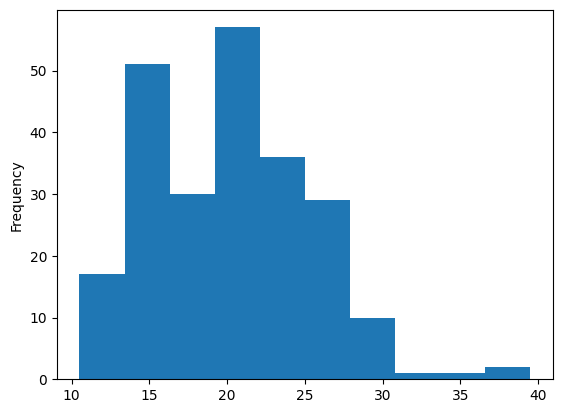

In [35]:
mpg.total.plot.hist()

In [40]:
!pip install koreanize_matplotlib

In [42]:
# 그림 선명하게
%config InlineBackend.figure_format = 'retina'

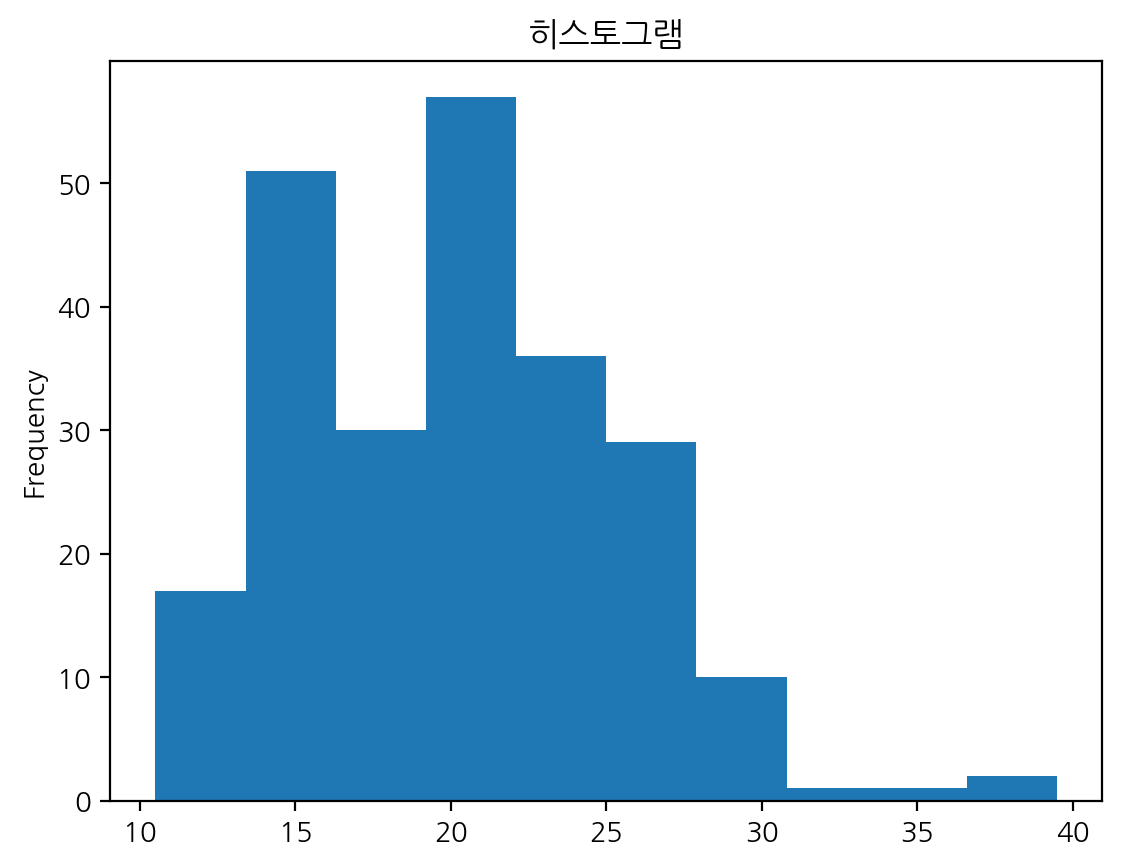

In [44]:
import koreanize_matplotlib
mpg.total.plot(kind='hist', title='히스토그램');

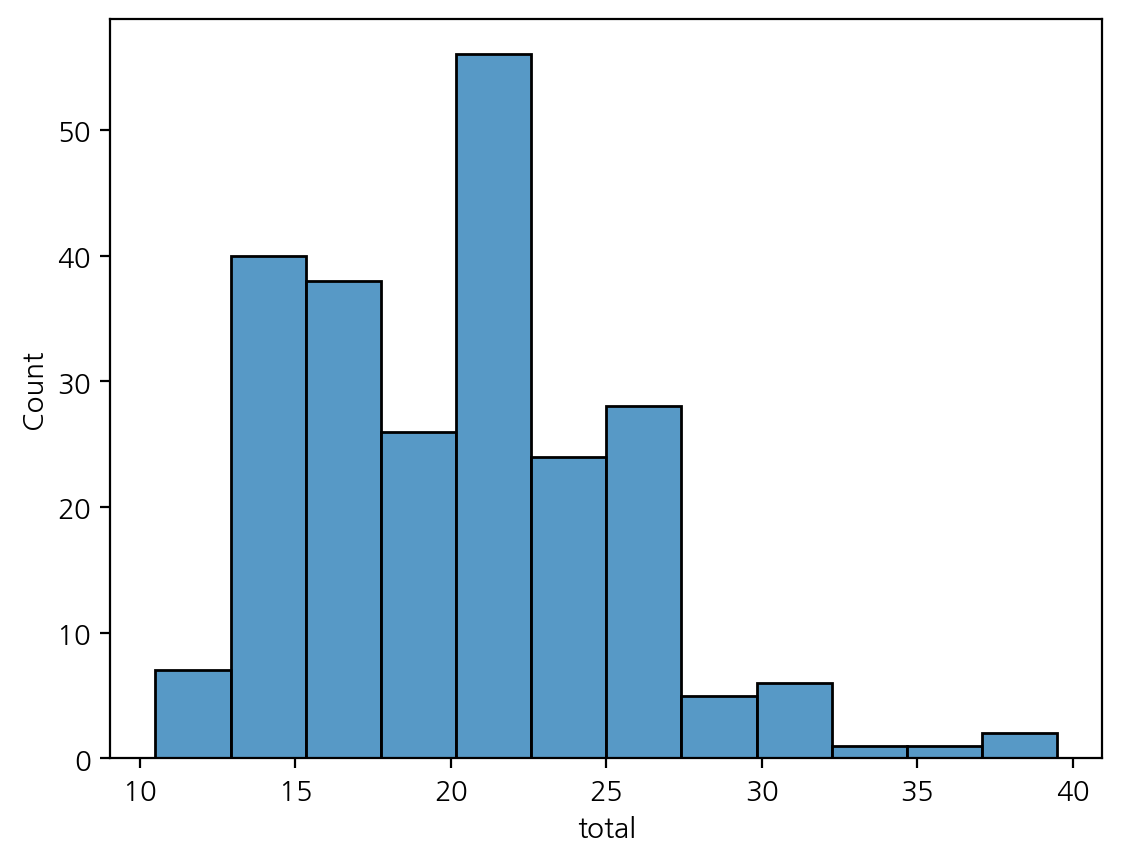

In [45]:
import seaborn as sns

sns.histplot(mpg, x='total');

## np.where()

In [46]:
np.where(mpg.total >= 20, 'pass', 'fail')

array(['pass', 'pass', 'pass', 'pass', 'pass', 'pass', 'pass', 'pass',
       'pass', 'pass', 'pass', 'pass', 'pass', 'pass', 'pass', 'fail',
       'pass', 'fail', 'fail', 'fail', 'fail', 'fail', 'fail', 'pass',
       'fail', 'pass', 'pass', 'fail', 'fail', 'fail', 'fail', 'fail',
       'pass', 'pass', 'pass', 'pass', 'pass', 'pass', 'pass', 'fail',
       'fail', 'pass', 'pass', 'fail', 'fail', 'fail', 'fail', 'fail',
       'fail', 'fail', 'fail', 'fail', 'fail', 'fail', 'fail', 'fail',
       'fail', 'fail', 'fail', 'fail', 'fail', 'fail', 'fail', 'fail',
       'fail', 'fail', 'fail', 'fail', 'fail', 'fail', 'fail', 'fail',
       'fail', 'fail', 'fail', 'fail', 'fail', 'fail', 'fail', 'fail',
       'fail', 'fail', 'fail', 'fail', 'fail', 'fail', 'fail', 'fail',
       'fail', 'fail', 'pass', 'pass', 'pass', 'pass', 'fail', 'fail',
       'fail', 'fail', 'fail', 'pass', 'pass', 'pass', 'pass', 'pass',
       'pass', 'pass', 'pass', 'pass', 'pass', 'pass', 'pass', 'pass',
      

In [47]:
mpg['test'] = np.where(mpg.total >=20, 'pass','fail')
mpg.sample(3)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category,total,mpg_mean,test
204,toyota,toyota tacoma 4wd,3.4,1999,6,auto(l4),4,15,19,r,pickup,17.0,17.0,fail
106,honda,civic,1.8,2008,4,auto(l5),f,24,36,c,subcompact,30.0,30.0,pass
185,toyota,camry,3.5,2008,6,auto(s6),f,19,28,r,midsize,23.5,23.5,pass


In [48]:
mpg['test'].value_counts()

,count
test,
pass,128
fail,106


In [49]:
mpg['test'].unique()

array(['pass', 'fail'], dtype=object)

In [52]:
count_test = mpg['test'].value_counts()  # 연비 합격 빈도표를 변수에 할당
count_test

,count
test,
pass,128
fail,106


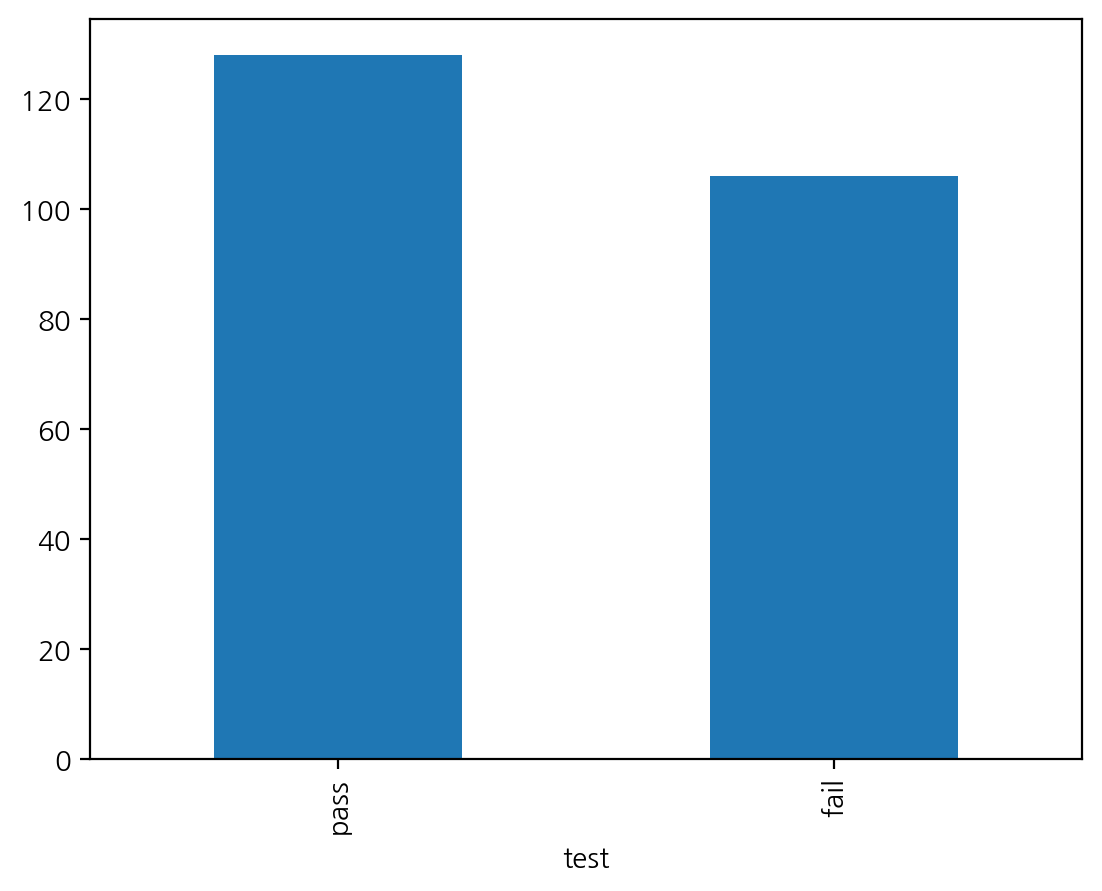

In [53]:
count_test.plot.bar();

<Axes: xlabel='test'>

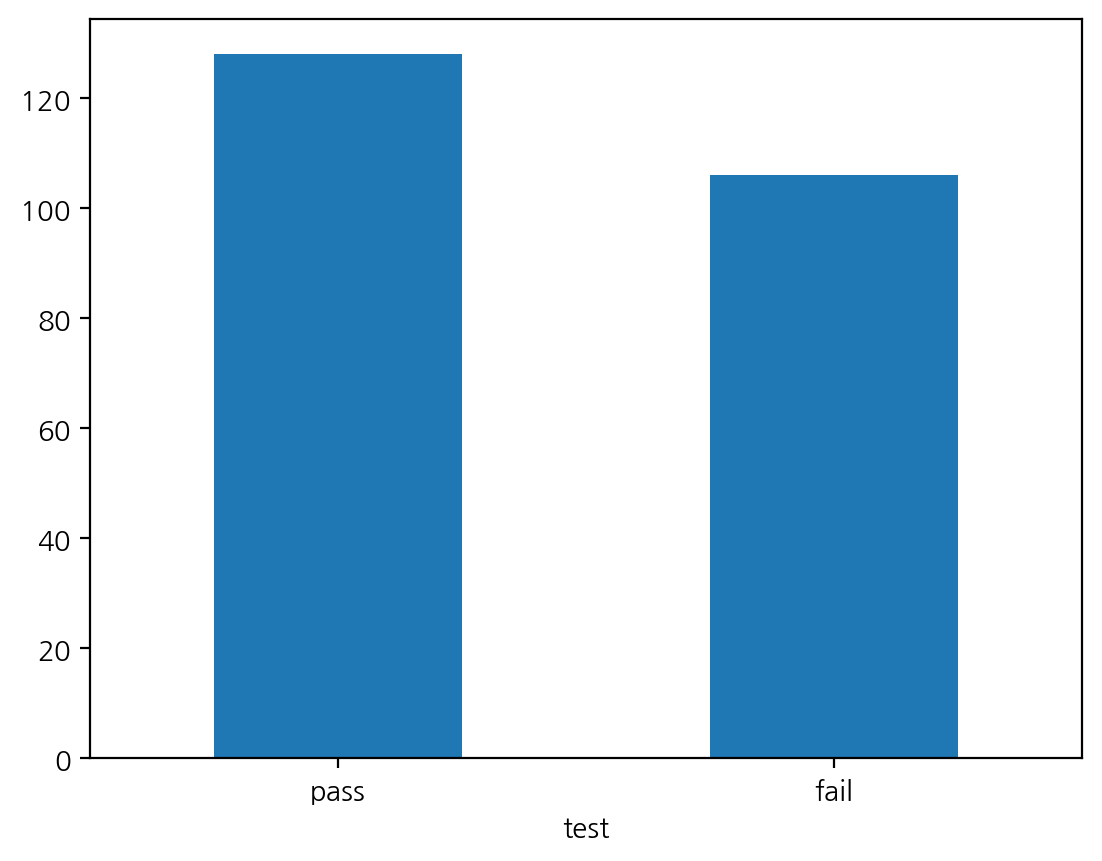

In [54]:
count_test.plot.bar(rot=0)

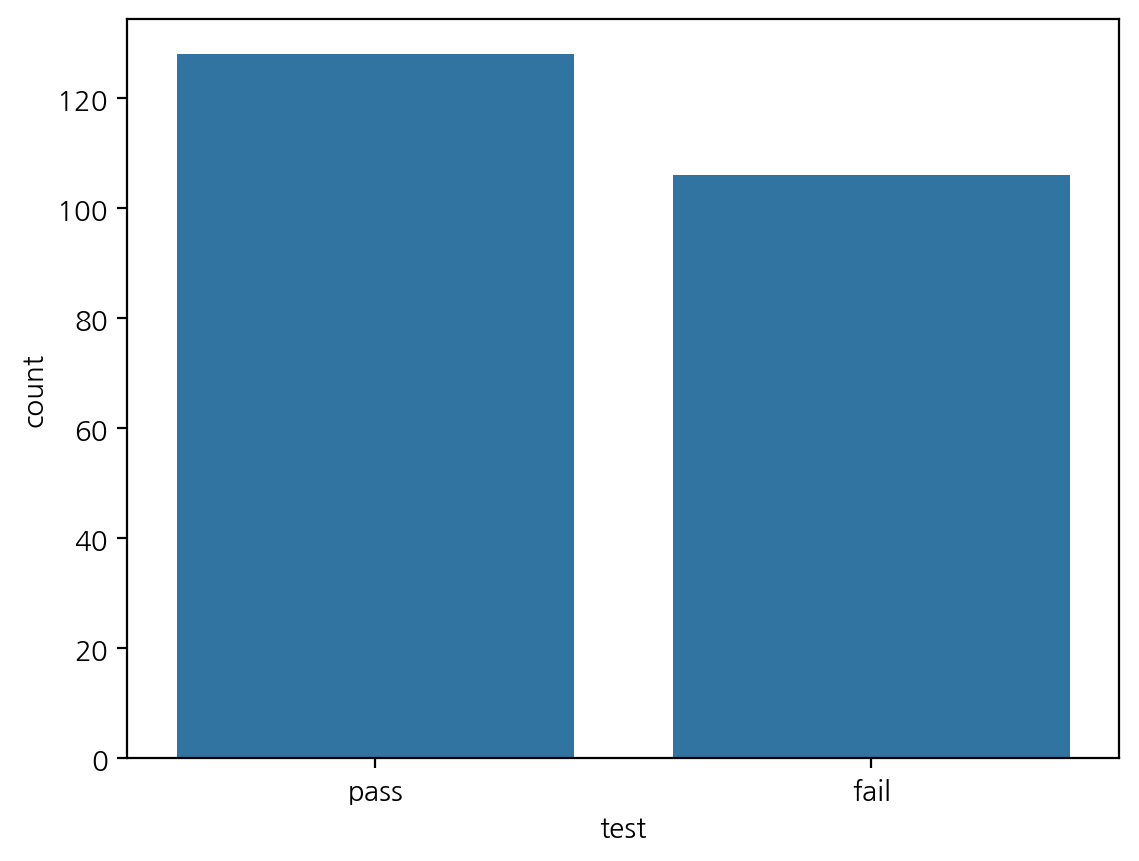

In [56]:
sns.countplot(mpg, x="test");

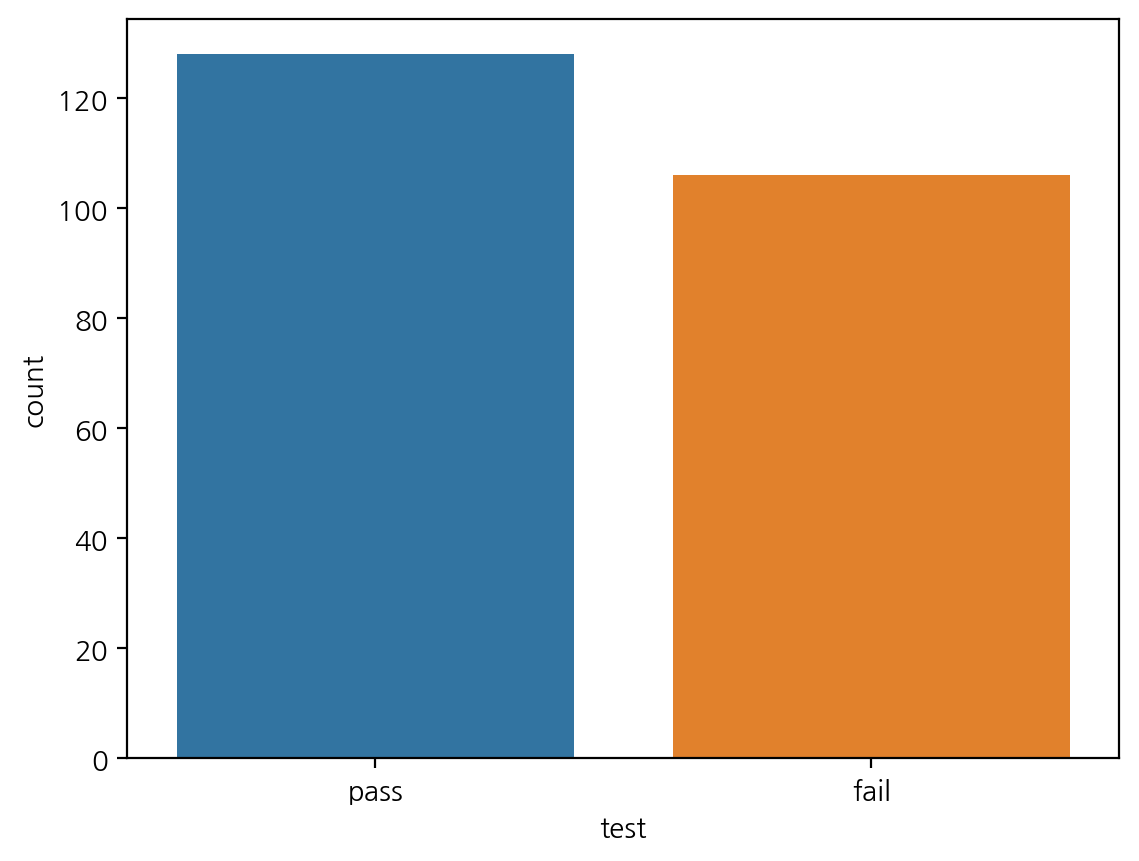

In [55]:
sns.countplot(mpg, x="test", hue='test');

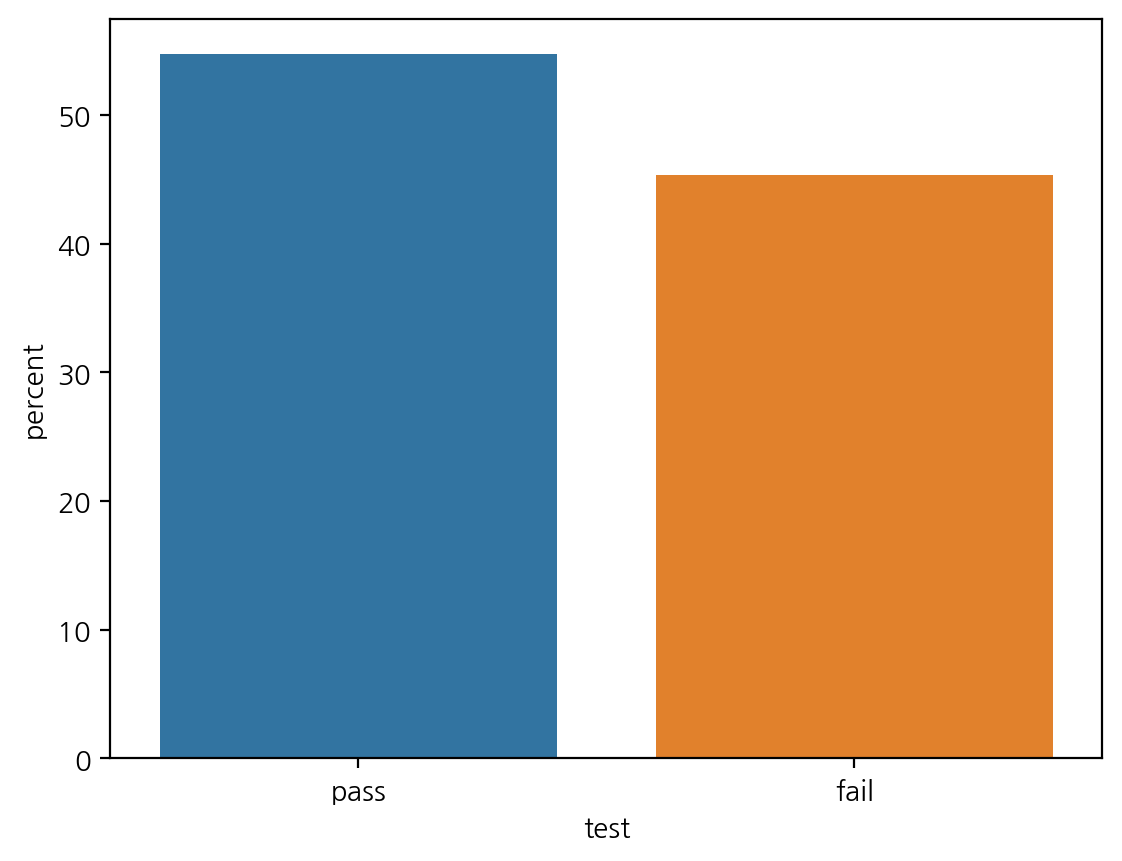

In [57]:
sns.countplot(mpg, x="test", hue='test', stat='percent');

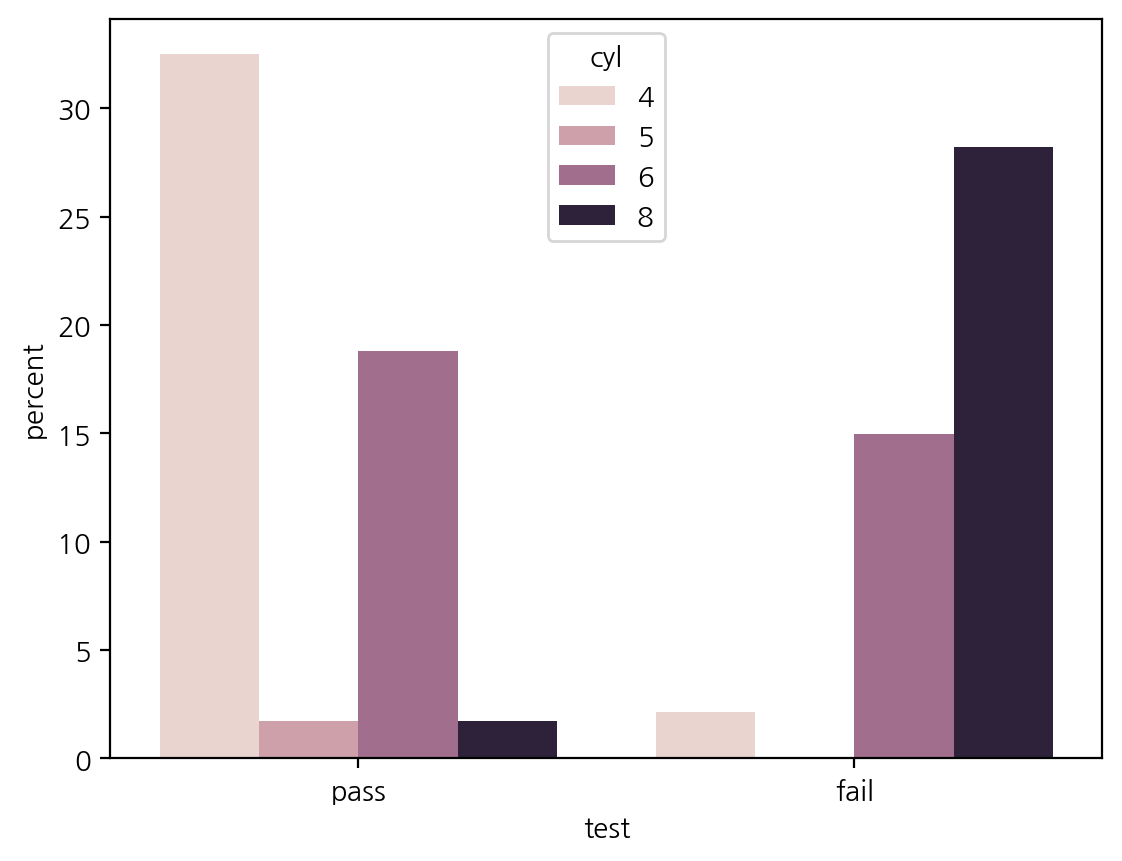

In [58]:
sns.countplot(mpg, x="test", hue='cyl', stat='percent');

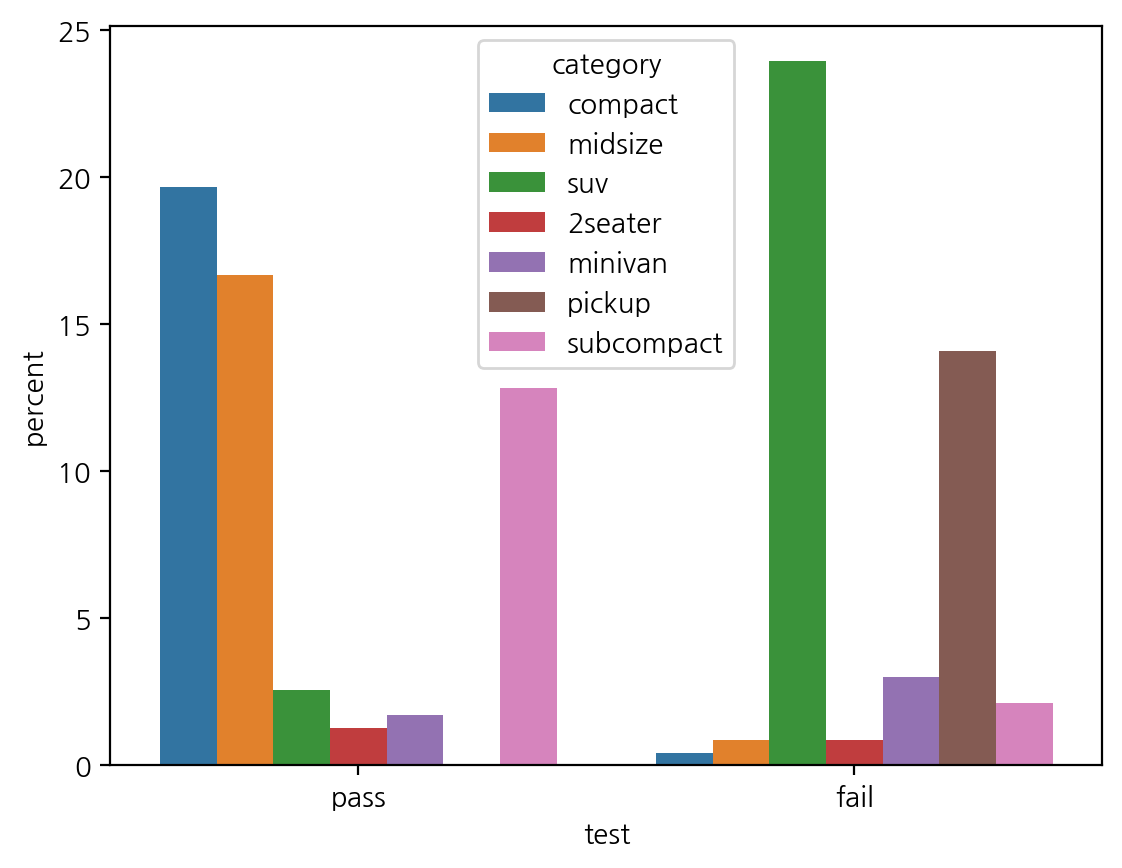

In [60]:
sns.countplot(mpg, x="test", hue='category', stat='percent');

In [67]:
mpg['grade'] = np.where(mpg.total >= 30, 'A' , np.where(mpg.total >= 20, 'B', 'C'))
mpg.sample(4)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category,total,mpg_mean,test,grade
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5,25.5,pass,B
176,toyota,4runner 4wd,3.4,1999,6,manual(m5),4,15,17,r,suv,16.0,16.0,fail,C
208,volkswagen,gti,2.0,1999,4,auto(l4),f,19,26,r,compact,22.5,22.5,pass,B
119,hyundai,tiburon,2.7,2008,6,auto(l4),f,17,24,r,subcompact,20.5,20.5,pass,B


In [69]:
count_grade = mpg['grade'].value_counts()  # 등급 빈도표 만들기
count_grade

,count
grade,
B,118
C,106
A,10


,count
grade,
B,118
C,106
A,10


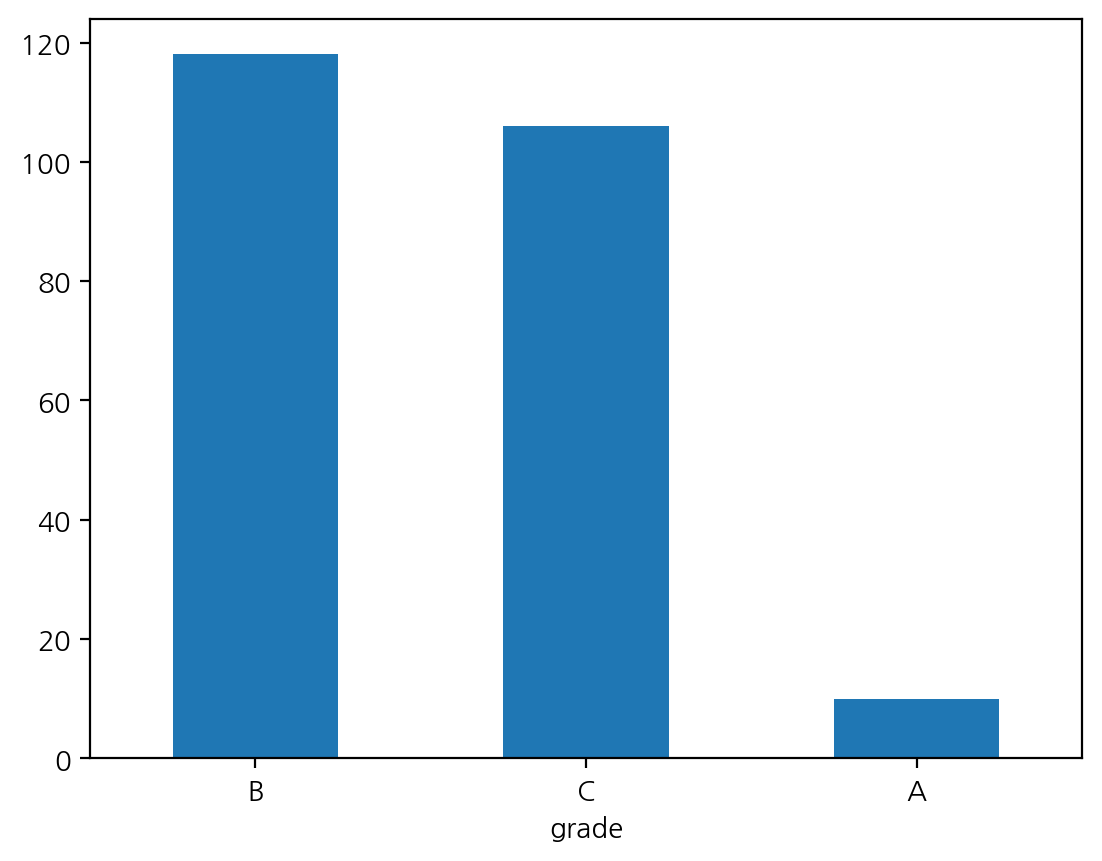

In [70]:
count_grade.plot.bar(rot=0);
count_grade

In [71]:
count_grade = mpg['grade'].value_counts().sort_values()
count_grade

,count
grade,
A,10
C,106
B,118


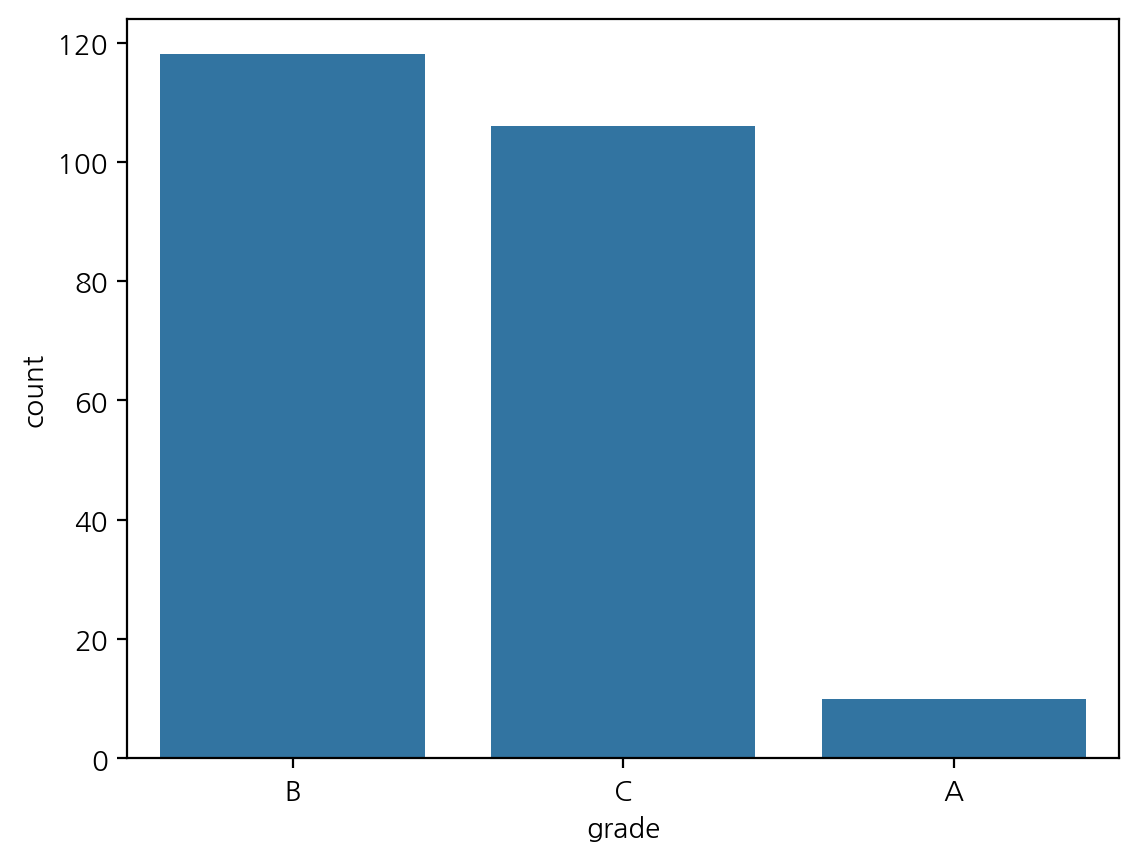

In [72]:
sns.countplot(mpg, x='grade');

<Axes: xlabel='grade', ylabel='count'>

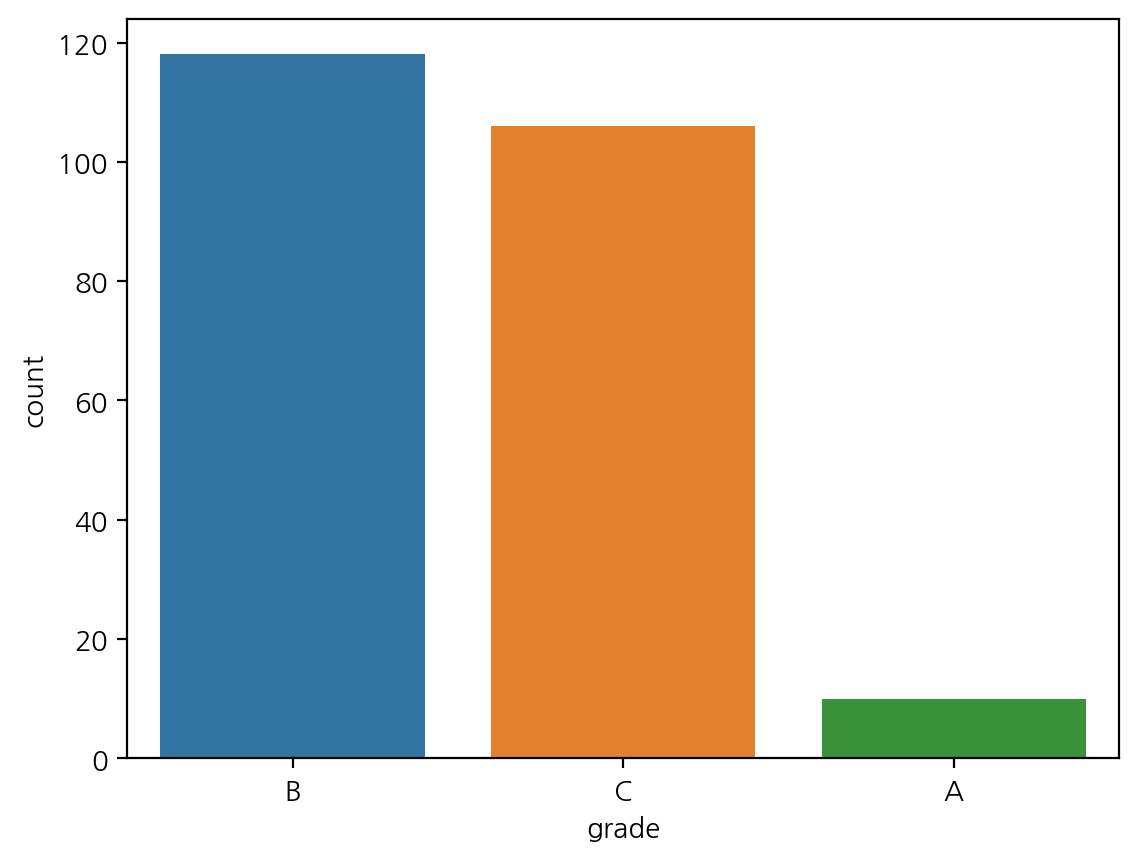

In [74]:
sns.countplot(mpg, x='grade', hue='grade')

<Axes: xlabel='grade', ylabel='percent'>

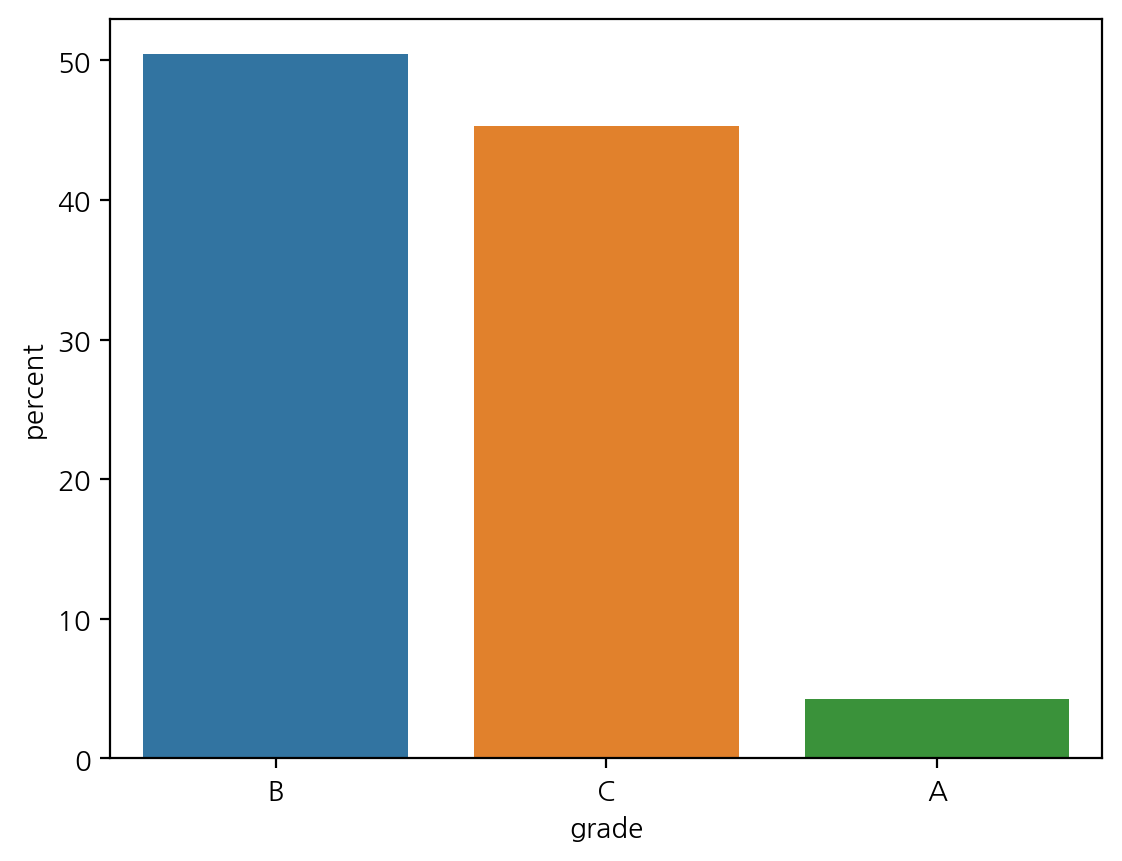

In [75]:
sns.countplot(mpg, x='grade', hue='grade', stat='percent')

In [79]:
mpg.grade.value_counts().sort_index().index

Index(['A', 'B', 'C'], dtype='object', name='grade')

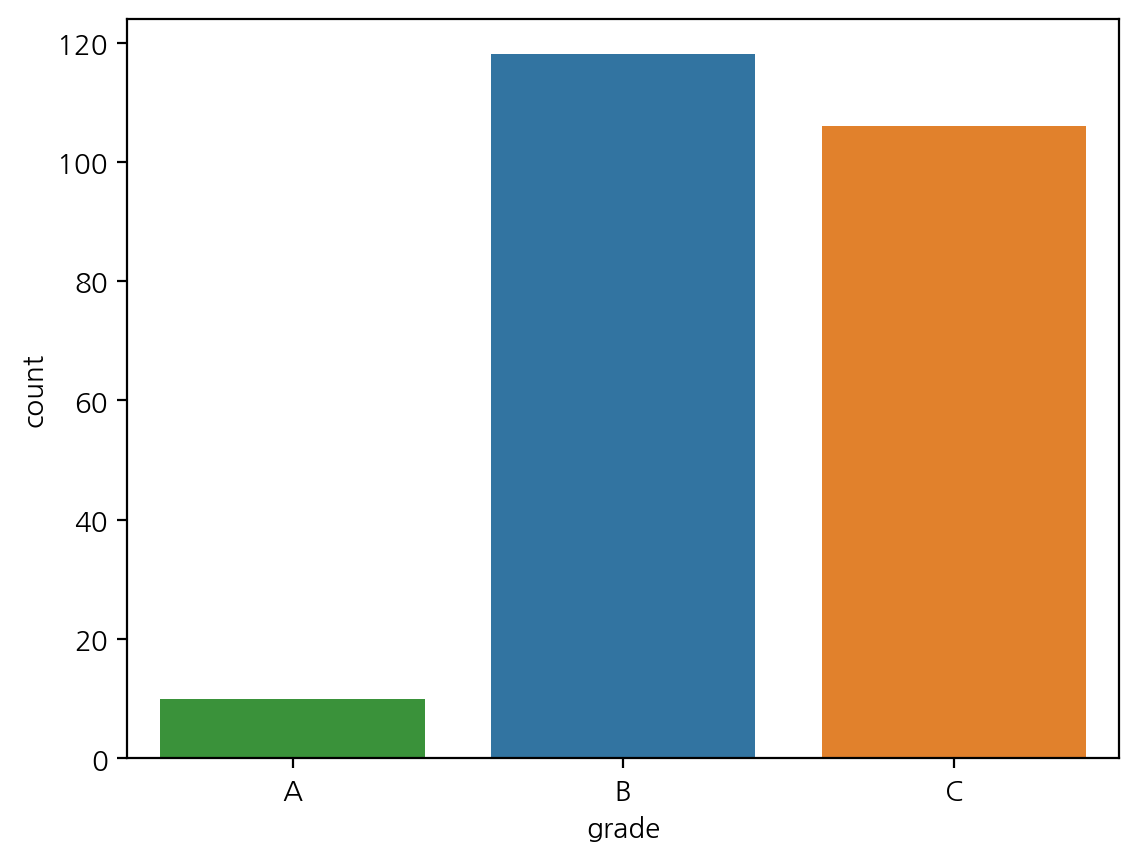

In [81]:
sns.countplot(mpg, x='grade', hue='grade', order=mpg.grade.value_counts().sort_index().index);

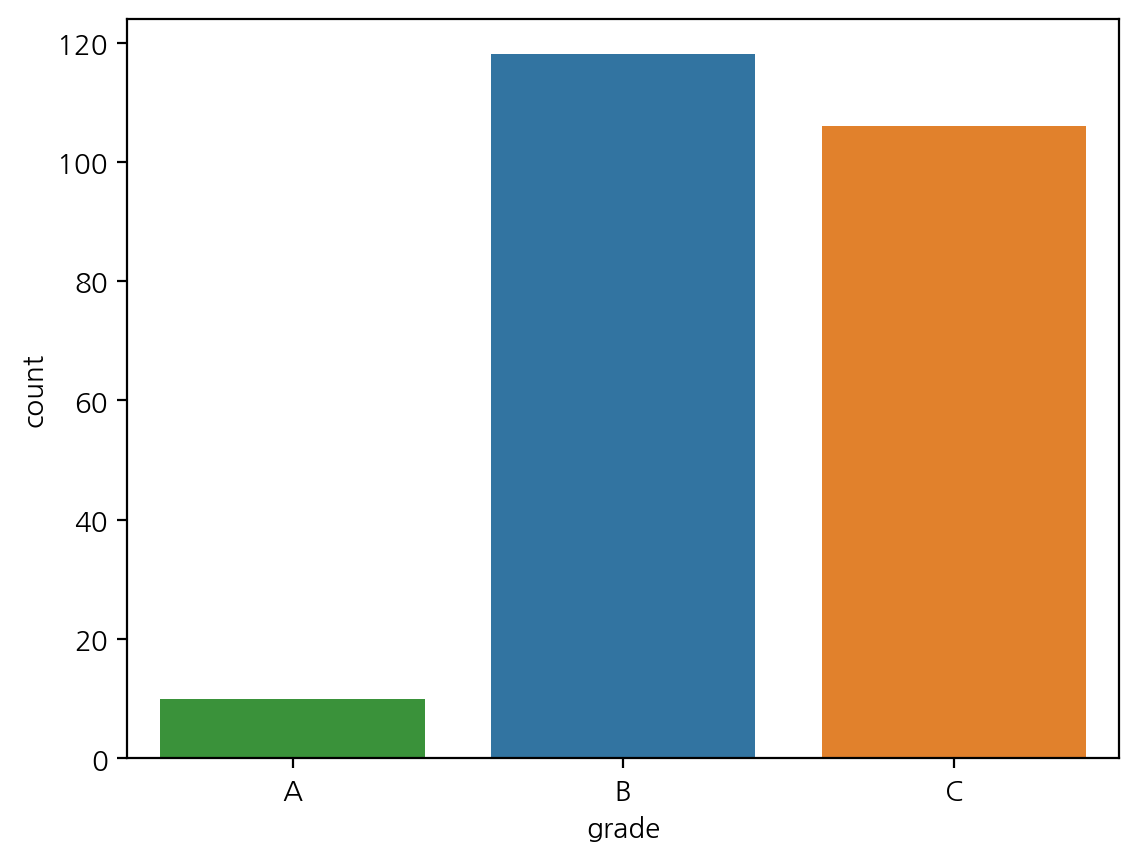

In [83]:
sns.countplot(mpg, x='grade', hue='grade', order=np.sort(mpg['grade'].unique()));

In [82]:
np.sort(mpg.grade.unique())

array(['A', 'B', 'C'], dtype=object)

In [84]:
s = mpg.grade
s = s.value_counts()
s = s.sort_index()
type(s)

pandas.core.series.Series

In [85]:
s = mpg['grade'].value_counts().sort_index()
s

,count
grade,
A,10
B,118
C,106


In [86]:
mpg['grade'] = np.where(mpg.total >= 30, 'A' ,
                        np.where(mpg.total >= 25, 'B',
                                 np.where(mpg.total >= 20, 'C','D')))
mpg.sample(4)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category,total,mpg_mean,test,grade
42,dodge,caravan 2wd,3.3,2008,6,auto(l4),f,17,24,r,minivan,20.5,20.5,pass,C
165,subaru,impreza awd,2.2,1999,4,auto(l4),4,21,26,r,subcompact,23.5,23.5,pass,C
156,pontiac,grand prix,3.8,1999,6,auto(l4),f,17,27,r,midsize,22.0,22.0,pass,C
194,toyota,corolla,1.8,1999,4,auto(l4),f,24,33,r,compact,28.5,28.5,pass,B


In [91]:
mpg['size'] = np.where((mpg.category == 'compact') | (mpg.category == 'subcompcat') | (mpg.category == '2seater'), 'small', 'large')

In [95]:
mpg['size'].value_counts()

,count
size,
large,182
small,52


In [96]:
mpg['size'] = np.where(mpg['category'].isin(['compact', 'subcompact', '2seater']), 'small', 'large') # 시험 문제

mpg['size'].value_counts()


,count
size,
large,147
small,87


## 정리하기

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  category      234 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 20.2+ KB


<Axes: xlabel='test'>

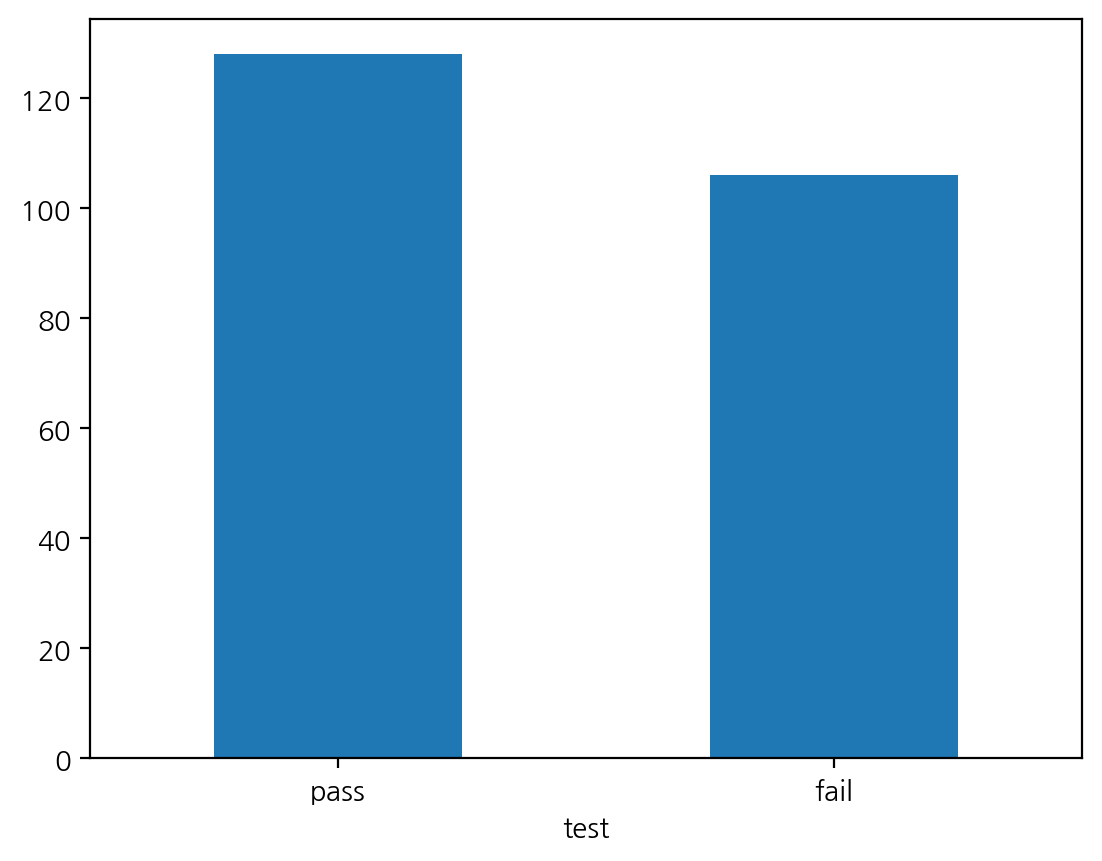

In [98]:
mpg = pd.read_csv('data/mpg.csv')

mpg.shape
mpg.head()
mpg.tail()
mpg.info()
mpg.describe()

mpg = mpg.rename(columns= {'manufacture' : 'company'})

mpg['total'] = (mpg['cty'] + mpg['hwy'] )/2
mpg['test'] = np.where(mpg['total'] >= 20, 'pass', 'fail')

count_test = mpg['test'].value_counts()
count_test.plot.bar(rot = 0)

## 단원06

In [100]:
exam = pd.read_csv('data/exam.csv')
exam.sample(3)

,id,nclass,math,english,science
15,16,4,58,98,65
6,7,2,80,90,45
7,8,2,90,78,25


In [101]:
exam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   id       20 non-null     int64
 1   nclass   20 non-null     int64
 2   math     20 non-null     int64
 3   english  20 non-null     int64
 4   science  20 non-null     int64
dtypes: int64(5)
memory usage: 932.0 bytes


In [102]:
exam.sample(frac=.2)

,id,nclass,math,english,science
9,10,3,50,98,45
2,3,1,45,86,78
12,13,4,46,98,65
6,7,2,80,90,45


In [103]:
exam.query('nclass == 2')

,id,nclass,math,english,science
4,5,2,25,80,65
5,6,2,50,89,98
6,7,2,80,90,45
7,8,2,90,78,25


In [104]:
exam.query('nclass != 2')

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58
8,9,3,20,98,15
9,10,3,50,98,45
10,11,3,65,65,65
11,12,3,45,85,32
12,13,4,46,98,65
13,14,4,48,87,12


In [105]:
exam['nclass'] == 2

,nclass
0,False
1,False
2,False
3,False
4,True
5,True
6,True
7,True
8,False
9,False


In [106]:
exam[exam['nclass'] == 2]

,id,nclass,math,english,science
4,5,2,25,80,65
5,6,2,50,89,98
6,7,2,80,90,45
7,8,2,90,78,25


In [107]:
exam.query('nclass == 2')

,id,nclass,math,english,science
4,5,2,25,80,65
5,6,2,50,89,98
6,7,2,80,90,45
7,8,2,90,78,25


In [108]:
exam.query('math > 50')

,id,nclass,math,english,science
1,2,1,60,97,60
6,7,2,80,90,45
7,8,2,90,78,25
10,11,3,65,65,65
14,15,4,75,56,78
15,16,4,58,98,65
16,17,5,65,68,98
17,18,5,80,78,90
18,19,5,89,68,87
19,20,5,78,83,58


In [109]:
exam.query('nclass == 1 & math >= 50')

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60


In [111]:
exam[(exam.nclass == 1) & (exam.math >= 50)]

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60


In [113]:
exam.query('english < 50 | science < 50')

,id,nclass,math,english,science
6,7,2,80,90,45
7,8,2,90,78,25
8,9,3,20,98,15
9,10,3,50,98,45
11,12,3,45,85,32
13,14,4,48,87,12


In [114]:
exam.query('nclass == 1 | nclass == 3 | nclass == 5')

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58
8,9,3,20,98,15
9,10,3,50,98,45
10,11,3,65,65,65
11,12,3,45,85,32
16,17,5,65,68,98
17,18,5,80,78,90


In [115]:
a = [1,3,5]
1 in a

True

In [116]:
4 in a

False

In [117]:
exam.query('nclass in [1,3,5]')

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58
8,9,3,20,98,15
9,10,3,50,98,45
10,11,3,65,65,65
11,12,3,45,85,32
16,17,5,65,68,98
17,18,5,80,78,90


In [120]:
exam.query('nclass.isin([1,3,5])')

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58
8,9,3,20,98,15
9,10,3,50,98,45
10,11,3,65,65,65
11,12,3,45,85,32
16,17,5,65,68,98
17,18,5,80,78,90


In [122]:
exam[ exam.nclass.isin([1,3,5]) ]

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58
8,9,3,20,98,15
9,10,3,50,98,45
10,11,3,65,65,65
11,12,3,45,85,32
16,17,5,65,68,98
17,18,5,80,78,90


In [123]:
nclass1 = exam.query('nclass == 1')
nclass1

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58


In [124]:
nclass2 = exam.query('nclass == 2')
nclass2

,id,nclass,math,english,science
4,5,2,25,80,65
5,6,2,50,89,98
6,7,2,80,90,45
7,8,2,90,78,25


In [125]:
nclass1.math.mean()

np.float64(46.25)

In [127]:
nclass2.english.mean()

np.float64(84.25)

In [128]:
df = pd.DataFrame({'sex'     : ['F', 'M', 'F', 'M'],
                   'country' : ['Korea', 'China', 'Japan', 'USA']})
df

,sex,country
0,F,Korea
1,M,China
2,F,Japan
3,M,USA


In [131]:
df.query("sex == 'M' & country == 'korea'")
df

,sex,country
0,F,Korea
1,M,China
2,F,Japan
3,M,USA


In [132]:
var = 3
exam.query('nclass == @var')

,id,nclass,math,english,science
8,9,3,20,98,15
9,10,3,50,98,45
10,11,3,65,65,65
11,12,3,45,85,32


In [133]:
var = 3
exam.query(f'nclass == {var}')

,id,nclass,math,english,science
8,9,3,20,98,15
9,10,3,50,98,45
10,11,3,65,65,65
11,12,3,45,85,32


In [134]:
df = pd.DataFrame({'num_legs': [2, 4], 'num_wings': [2, 0]},
                  index=['falcon', 'dog'])
df

,num_legs,num_wings
falcon,2,2
dog,4,0


In [135]:
df.isin([0, 4])

,num_legs,num_wings
falcon,False,False
dog,True,True


In [136]:
~df.isin([0, 4])

,num_legs,num_wings
falcon,True,True
dog,False,False


In [137]:
exam.columns

Index(['id', 'nclass', 'math', 'english', 'science'], dtype='object')

In [138]:
exam.columns[3]

'english'

In [139]:
exam[exam.columns[3]]

,english
0,98
1,97
2,86
3,98
4,80
5,89
6,90
7,78
8,98
9,98


In [140]:
exam.columns[1:3]

Index(['nclass', 'math'], dtype='object')

In [141]:
exam[exam.columns[1:3]]

,nclass,math
0,1,50
1,1,60
2,1,45
3,1,30
4,2,25
5,2,50
6,2,80
7,2,90
8,3,20
9,3,50


In [142]:
exam.drop(columns=["math", 'english'])

,id,nclass,science
0,1,1,50
1,2,1,60
2,3,1,78
3,4,1,58
4,5,2,65
5,6,2,98
6,7,2,45
7,8,2,25
8,9,3,15
9,10,3,45


In [143]:
exam.drop(2)

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
3,4,1,30,98,58
4,5,2,25,80,65
5,6,2,50,89,98
6,7,2,80,90,45
7,8,2,90,78,25
8,9,3,20,98,15
9,10,3,50,98,45
10,11,3,65,65,65


In [144]:
exam.drop([2, 4, 6])

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
3,4,1,30,98,58
5,6,2,50,89,98
7,8,2,90,78,25
8,9,3,20,98,15
9,10,3,50,98,45
10,11,3,65,65,65
11,12,3,45,85,32
12,13,4,46,98,65


In [145]:
exam.drop(index=[2, 4, 6])

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
3,4,1,30,98,58
5,6,2,50,89,98
7,8,2,90,78,25
8,9,3,20,98,15
9,10,3,50,98,45
10,11,3,65,65,65
11,12,3,45,85,32
12,13,4,46,98,65


In [146]:
exam.drop(labels=[2, 4, 6], axis=0)

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
3,4,1,30,98,58
5,6,2,50,89,98
7,8,2,90,78,25
8,9,3,20,98,15
9,10,3,50,98,45
10,11,3,65,65,65
11,12,3,45,85,32
12,13,4,46,98,65


In [147]:
exam.drop(labels=["math", "english"], axis=1)

,id,nclass,science
0,1,1,50
1,2,1,60
2,3,1,78
3,4,1,58
4,5,2,65
5,6,2,98
6,7,2,45
7,8,2,25
8,9,3,15
9,10,3,45


In [148]:
exam.query('nclass == 1')['math']

,math
0,50
1,60
2,45
3,30


In [149]:
exam.query('nclass == 1')[['math']]

,math
0,50
1,60
2,45
3,30


In [150]:
exam.query('nclass == 1')[['math', 'english']]

,math,english
0,50,98
1,60,97
2,45,86
3,30,98


In [151]:
exam.query('math >= 50')[['id', 'math']]

,id,math
0,1,50
1,2,60
5,6,50
6,7,80
7,8,90
9,10,50
10,11,65
14,15,75
15,16,58
16,17,65


In [153]:
exam[exam.math >= 50][['id', 'math']]

,id,math
0,1,50
1,2,60
5,6,50
6,7,80
7,8,90
9,10,50
10,11,65
14,15,75
15,16,58
16,17,65


In [152]:
exam[exam.math >= 50][['id', 'math']].head(3)

,id,math
0,1,50
1,2,60
5,6,50


In [154]:
exam.query('math >= 50') \
    [['id', 'math']] \
    .head(10)

,id,math
0,1,50
1,2,60
5,6,50
6,7,80
7,8,90
9,10,50
10,11,65
14,15,75
15,16,58
16,17,65


## 정렬

In [155]:
exam.sort_values('math', ascending=False).head(4)

,id,nclass,math,english,science
7,8,2,90,78,25
18,19,5,89,68,87
6,7,2,80,90,45
17,18,5,80,78,90


In [156]:
exam.sort_values(['nclass', 'math']).head(10)

,id,nclass,math,english,science
3,4,1,30,98,58
2,3,1,45,86,78
0,1,1,50,98,50
1,2,1,60,97,60
4,5,2,25,80,65
5,6,2,50,89,98
6,7,2,80,90,45
7,8,2,90,78,25
8,9,3,20,98,15
11,12,3,45,85,32


In [157]:
exam.sort_values(['nclass', 'math'], ascending=[True, False]).head(10)

,id,nclass,math,english,science
1,2,1,60,97,60
0,1,1,50,98,50
2,3,1,45,86,78
3,4,1,30,98,58
7,8,2,90,78,25
6,7,2,80,90,45
5,6,2,50,89,98
4,5,2,25,80,65
10,11,3,65,65,65
9,10,3,50,98,45


In [158]:
exam.sort_index(ascending=False).head()

,id,nclass,math,english,science
19,20,5,78,83,58
18,19,5,89,68,87
17,18,5,80,78,90
16,17,5,65,68,98
15,16,4,58,98,65


# 종료